In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from datetime import datetime
plt.style.use('ggplot')
from sklearn.metrics import mean_squared_error

In [2]:
# Download data from Banxico API

In [3]:
token = "c5d33d249fc76bf8e9c1940625cc17d469c6bb59c7366acbf19eb28fc6e036d1"

In [44]:
def get_data(token, idseries):
    main = "https://www.banxico.org.mx/SieAPIRest/service/v1/series/"
    query = main  + idseries + "/datos?token=" +  token  
    
    response = requests.get(query)
    if response.status_code != 200:
                return "Some error ocurred!"    
    else:
        raw_data = response.json()['bmx']['series'][0]['datos']
        data = [(datetime.strptime(i['fecha'],"%d/%m/%Y"),float(i['dato'])) for i in raw_data]
        return pd.DataFrame(data, columns=['date','value'])

In [45]:
inflation = get_data(token=token, idseries="SF63528")

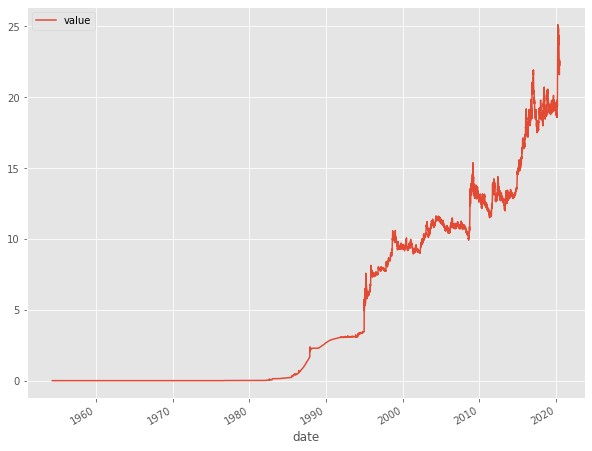

In [46]:
inflation.plot(x='date',y='value', figsize=(10,8))

In [51]:
inflation.describe()

,value
count,16817.000000
mean,5.054041
std,6.259561
min,0.012500
25%,0.012500
50%,0.882000
75%,10.517500
max,25.118500


In [69]:
inflation['inf20'] = inflation.value.rolling(window = 7).mean()

In [104]:
filter90= inflation['date']>='2020-01-01'

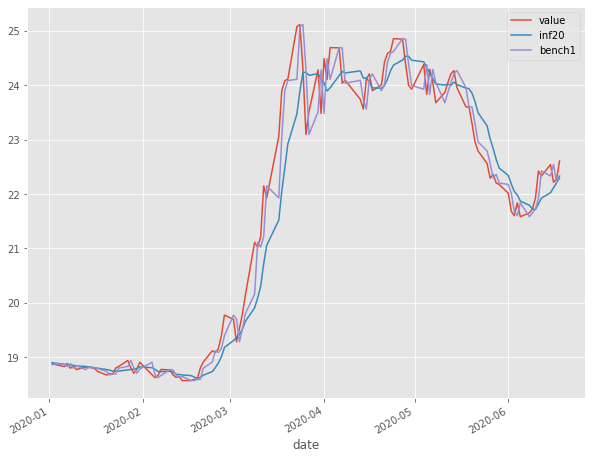

In [105]:
inflation[filter90].set_index('date').plot(figsize=(10,8))

# Benchmark
### Last value

In [106]:
inflation['bench1'] = inflation.value.shift(1)

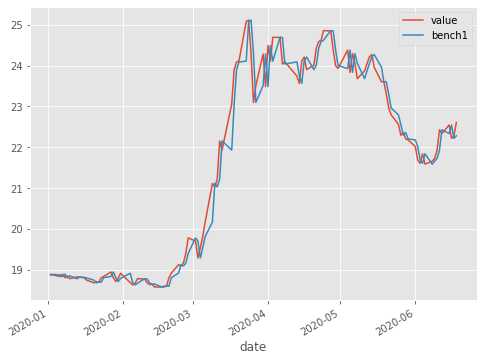

In [107]:
inflation[filter90].set_index('date')[['value','bench1']].plot(figsize=(8,6))

In [109]:
error = mean_squared_error(inflation[filter90].value,inflation[filter90].bench1)

In [113]:
print(f"Benchmark RMSE: {np.sqrt(error):.4f}")

Benchmark RMSE: 0.3582


# ARIMA